<a href="https://colab.research.google.com/github/Harshal2675/Deep-Learning/blob/main/Copy_of_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PIP

In [1]:
!pip install neuralforecast

!pip install datasetsforecast


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.0/235.0 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.5/223.5 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 812.3/812.3 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 MB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 2.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 M

#Libraries

In [2]:
from neuralforecast import NeuralForecast
from neuralforecast.auto import NHITS, BiTCN
from neuralforecast.models import LSTM, NHITS, RNN
import pandas as pd
from neuralforecast.auto import NHITS, BiTCN
from neuralforecast.core import NeuralForecast
import logging
logging.getLogger("pytorch_lightning").setLevel(logging.WARNING)
import matplotlib.pyplot as plt


#**DATASET** - NA

In [3]:
import pandas as pd

# Assuming you have your data in lists or arrays
unique_ids = []  # Your list of unique IDs
dates = []       # Your list of dates
values = []      # Your list of target values
data =pd.read_csv('/input - Sheet1.csv')

df = pd.DataFrame({
    'unique_id': unique_ids,
    'ds': dates,
    'y': values
})

# Ensure correct data types
df['unique_id'] = data['unique_id']
df['ds'] = pd.to_datetime(data['ds'])
df['y'] = data['y']

# Now Y_df is ready to use with Nixtla libraries
Y_df = df
print(Y_df)

FileNotFoundError: [Errno 2] No such file or directory: '/input - Sheet1.csv'

In [ ]:
Y_df.groupby('unique_id').head(2)

In [ ]:
Y_df.groupby('unique_id').tail(2)

#**Dataeset**

In [5]:
df = pd.read_csv('/content/DATA - Sheet1.csv')
df['ds'] = pd.to_datetime(df['ds'])
df.head()

,unique_id,year,weekofyear,ds,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,y
0,sj,1991,1,1991-01-01,0.1465,0.140467,0.151500,0.167314,0.00,297.060000,...,72.938571,0.00,13.511429,2.528571,24.385714,7.457143,29.4,18.9,5.3,21
1,sj,1991,2,1991-01-08,NaN,0.100467,0.251900,0.137617,15.85,297.674286,...,76.628571,15.85,14.671429,1.885714,24.914286,6.314286,28.3,21.1,31.7,21
2,sj,1991,3,1991-01-15,NaN,0.293567,0.259943,0.217900,0.00,297.422857,...,78.500000,0.00,14.798571,2.000000,25.242857,6.571429,29.4,21.1,16.5,26
3,sj,1991,4,1991-01-22,0.3313,0.309333,0.221029,0.202757,0.00,297.884286,...,71.597143,0.00,13.878571,2.557143,24.714286,7.771429,29.4,18.3,6.8,34
4,sj,1991,5,1991-01-29,0.0917,0.246425,0.243857,0.195600,0.00,298.044286,...,71.784286,0.00,14.044286,2.771429,24.828571,8.157143,30.0,18.9,5.9,37


#**Interpolate**

In [6]:

# Assuming df is your DataFrame
# Columns to interpolate
columns_to_interpolate = ['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm',
                          'reanalysis_air_temp_k', 'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
                          'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
                          'reanalysis_precip_amt_kg_per_m2', 'reanalysis_relative_humidity_percent',
                          'reanalysis_sat_precip_amt_mm', 'reanalysis_specific_humidity_g_per_kg',
                          'reanalysis_tdtr_k', 'station_avg_temp_c', 'station_diur_temp_rng_c',
                          'station_max_temp_c', 'station_min_temp_c', 'station_precip_mm']

# Perform linear interpolation along specified columns
df[columns_to_interpolate] = df[columns_to_interpolate].interpolate(method='linear')

# Display the interpolated DataFrame

df.isnull().sum()

unique_id                                0
year                                     0
weekofyear                               0
ds                                       0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

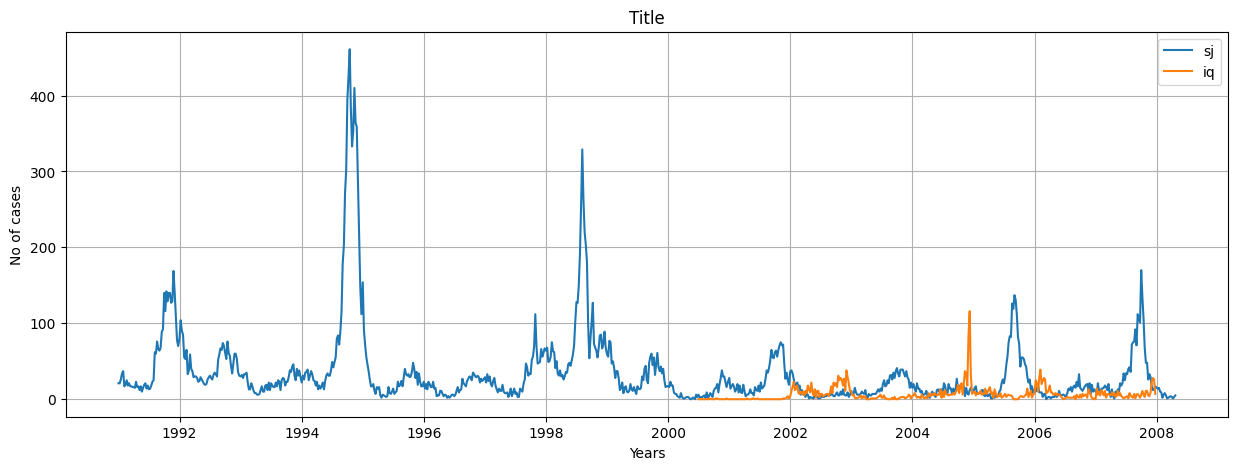

In [7]:
filtered_df_sj = df[df['unique_id'] == 'sj']
filtered_df_iq = df[df['unique_id'] == 'iq']

# Plot the data
plt.figure(figsize=(15, 5))

# Assuming you want to plot both 'sj' and 'iq' on the same plot for comparison
plt.plot(filtered_df_sj['ds'], filtered_df_sj['y'], label='sj')
plt.plot(filtered_df_iq['ds'], filtered_df_iq['y'], label='iq')

plt.xlabel('Years')
plt.ylabel('No of cases')
plt.title('Title')
plt.legend()
plt.grid()
plt.show()

#**Model**

In [9]:
horizon = 3
models = [NHITS(h = horizon,
                input_size = 4*horizon,
                futr_exog_list = ['weekofyear'], # <- Future exogenous variables
                hist_exog_list = ['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm',
                'reanalysis_air_temp_k', 'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
                'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
                'reanalysis_precip_amt_kg_per_m2', 'reanalysis_relative_humidity_percent',
                'reanalysis_sat_precip_amt_mm', 'reanalysis_specific_humidity_g_per_kg',
                'reanalysis_tdtr_k', 'station_avg_temp_c', 'station_diur_temp_rng_c',
                'station_max_temp_c', 'station_min_temp_c', 'station_precip_mm'], # <- Historical exogenous variables
                scaler_type = 'robust'),
          BiTCN(h = horizon,
                input_size = 4*horizon,
                futr_exog_list = ['weekofyear'], # <- Future exogenous variables
                hist_exog_list = ['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm',
                'reanalysis_air_temp_k', 'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
                'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
                'reanalysis_precip_amt_kg_per_m2', 'reanalysis_relative_humidity_percent',
                'reanalysis_sat_precip_amt_mm', 'reanalysis_specific_humidity_g_per_kg',
                'reanalysis_tdtr_k', 'station_avg_temp_c', 'station_diur_temp_rng_c',
                'station_max_temp_c', 'station_min_temp_c', 'station_precip_mm'], # <- Historical exogenous variables
                scaler_type = 'robust'),
                ]


INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:lightning_fabric.utilities.seed:Seed set to 1


#**Training**

In [ ]:
nf = NeuralForecast(models=models, freq='W-MON')
nf.fit(df=df)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

In [ ]:
futr_df = pd.read_csv('/content/final - Sheet1 (1).csv')
futr_df['ds'] = pd.to_datetime(futr_df['ds'])
futr_df.isnull().sum()
print(futr_df.isnull().sum())

# Ensure column names are as expected by the model
print(futr_df.columns)


unique_id     0
ds            0
weekofyear    0
dtype: int64
Index(['unique_id', 'ds', 'weekofyear'], dtype='object')


In [ ]:
expected_future = nf.make_future_dataframe()
print(expected_future.head())

  unique_id         ds
0        iq 2007-12-31
1        iq 2008-01-07
2        iq 2008-01-14
3        sj 2008-04-28
4        sj 2008-05-05


In [ ]:
missing_future = nf.get_missing_future(futr_df)
print(missing_future.head())

  unique_id         ds
0        iq 2007-12-31
1        iq 2008-01-07
2        iq 2008-01-14
3        sj 2008-04-28
4        sj 2008-05-05


In [ ]:
complete_futr_df = pd.concat([futr_df, missing_future]).sort_values(['unique_id', 'ds'])

In [ ]:

complete_futr_df['weekofyear'] = complete_futr_df['ds'].dt.isocalendar().week
complete_futr_df['weekofyear'] = complete_futr_df['weekofyear'].fillna(method='ffill')
Y_hat_df = nf.predict(futr_df=complete_futr_df)

Predicting: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:199: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [ ]:
print(Y_hat_df.head())
print(Y_hat_df.describe())

          ds      NHITS      BiTCN
0 2007-12-31   8.369679  18.754324
1 2008-01-07  25.475460  22.200287
2 2008-01-14  20.359997  19.298323
3 2008-04-28   4.415072   3.156112
4 2008-05-05   6.812761   3.104270
                        ds      NHITS      BiTCN
count                    6   6.000000   6.000000
mean   2008-03-06 12:00:00  12.014565  11.646370
min    2007-12-31 00:00:00   4.415072   3.104270
25%    2008-01-08 18:00:00   6.694005   3.208309
50%    2008-03-06 12:00:00   7.591220  11.059611
75%    2008-05-03 06:00:00  17.362417  19.162323
max    2008-05-12 00:00:00  25.475460  22.200287
std                    NaN   8.691022   9.317675


KeyError: 'y'

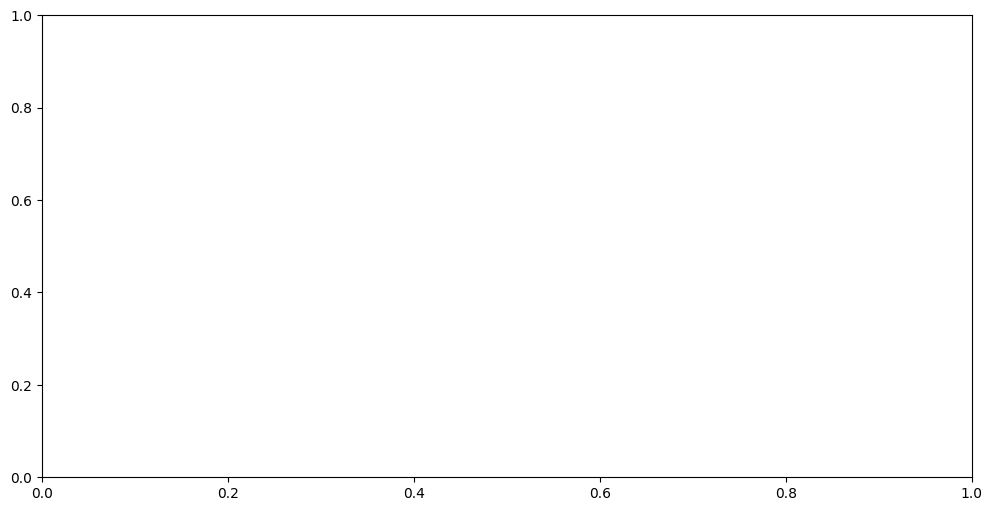

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_forecast(Y_hat_df):
    fig, ax = plt.subplots(figsize=(12, 6))

    if 'unique_id' in Y_hat_df.columns:
        for uid in Y_hat_df['unique_id'].unique():
            data = Y_hat_df[Y_hat_df['unique_id'] == uid]
            ax.plot(data['ds'], data['y'], label=uid)
        ax.legend()
    else:
        # Handle the case where 'unique_id' is not present
        ax.plot(Y_hat_df['ds'], Y_hat_df['y'])

    ax.set_title(title)
    ax.set_xlabel('Date')
    ax.set_ylabel('Value')
    plt.tight_layout()
    plt.show()

plot_forecast(Y_hat_df)

In [ ]:
from statsforecast.evaluation import evaluate

# Assuming you have actual values in a DataFrame called 'actual_df'
accuracy = evaluate(Y_hat_df, df)
print(accuracy)

ModuleNotFoundError: No module named 'statsforecast'

In [ ]:


# Filter and reset index for the original dataframe
plot_df = df[df['unique_id'] == 'sj'].tail(24 * 5).reset_index(drop=True)
plot_df = df[df['unique_id'] == 'iq'].tail(24 * 5).reset_index(drop=True)
# Ensure Y_hat_df is properly reset and filtered
Y_hat_df = Y_hat_df.reset_index(drop=True)
Y_hat_df = Y_hat_df[Y_hat_df['unique_id'] == 'iq']

# Concatenate the train and forecast dataframes
plot_df = pd.concat([plot_df, Y_hat_df]).set_index('ds')

# Plot the data
plot_df[['y', 'NHITS', 'BiTCN']].plot(linewidth=2)
plt.axvline('2009-01-01', color='red')
plt.ylabel('Price [EUR/MWh]', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.grid()
plt.show()


KeyError: 'unique_id'